In [3]:
import tensorflow as tf                                # 딥러닝 모델 생성을 위한 텐서플로우 라이브러리 호출
from tensorflow.keras import layers, models            # 신경망 레이어와 모델 구성 도구 호출
from sklearn.model_selection import train_test_split   # 데이터를 학습/테스트하기 위해 나누기 위해 사용
from sklearn.preprocessing import StandardScaler       # 입력 데이터를 정규화하기 위해 사용하는 라이브러리
from sklearn.datasets import fetch_california_housing  # 회귀 분석 실습용 캘리포니아 주택 가격 데이터 가져옴

In [5]:
# 1. 데이터 로드
'''
MedInc (Median Income): 블록(지역 그룹)의 중간 소득 (단위: 10,000달러)
HouseAge (House Age): 블록 내 주택의 중간 연도
AveRooms (Average Rooms): 가구당 평균 방 수
AveBedrms (Average Bedrooms): 가구당 평균 침실 수
Population (Population): 블록 내 인구 수
AveOccup (Average Occupancy): 가구당 평균 거주자 수
Latitude (위도): 블록의 위도
Longitude (경도): 블록의 경도 
'''

data = fetch_california_housing()            # 캘리포니아 데이터 가져오기 (메모리)
X = data.data                                 # 입력 변수 
y = data.target                              # 예측해야 할 값 (집값)



In [7]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [8]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [12]:
# 2. 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42      # 데이터 80%는 학습용으로 사용, 20%는 테스트 데이터로 분리해서 모델 성능 평가에 사용하기 위한 데이터셋 설정
)


In [13]:
# 3. 데이터 정규화(스케일링)
scaler = StandardScaler()                    # 평균 0, 표준편차 1로 변환하기 위한 스케일러 객체 생성         
X_train = scaler.fit_transform(X_train)      # 학습 데이터를 기준으로 스케일을 맞추고 변환
X_test = scaler.transform(X_test)            # 테스트 데이터도 같은 기준으로 변환

In [14]:
X_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]], shape=(16512, 8))

In [15]:
X_test

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]], shape=(4128, 8))

In [17]:
# 4. 회귀 모델 생성
model = models.Sequential([                                       # Sequential 구조로 신경망 모델을 생성 
    layers.Dense(64, activation='relu', input_shape=(8,)),        # 첫 번째 은닉층을 만들고, 64개의 뉴런으로 입력은 8개의 특성이고, relu 활성화 함수 사용  
    layers.Dense(32, activation='relu'),                          # 두 벚째 은닉층을 만들고, 32개의 뉴런으로 학습 
    layers.Dense(1)                                               # 출력층은 집값처럼 연속값을 예측하기때문에 뉴런 1개로 구성하고 활성화 함수는 사용하지 않음
])

D:\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# 5. 모델 설정(컴파일)
model.compile(
    optimizer='adam',               # Adam 옵티마이저로 가중치를 효율적으로 업데이트
    loss='mse',                     # 회귀에서 평균제곱오차(MSE)를 손실 함수로 사용
    metrics=['mae']                 # 예측 오차를 직관적으로 확인하기 위해 MAE를 추가
)

In [20]:
# 6.모델 학습
history = model.fit(
    X_train, y_train,               # 학습에 사용할 입력과 출력 Label값 넣음
    epochs = 15,                    # 데이터를 15번 반복해서 학습
    batch_size = 32,               # 32개의 샘플씩 모델에게 제공해서 가중치를 업데이트
    validation_split = 0.2          # 학습 데이터 중에서 20%는 검증 데이터로 사용해서 과적합 여부 확인
)


Epoch 1/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1962 - mae: 0.7216 - val_loss: 0.5267 - val_mae: 0.5237
Epoch 2/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4465 - mae: 0.4718 - val_loss: 0.4211 - val_mae: 0.4656
Epoch 3/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3825 - mae: 0.4419 - val_loss: 0.3942 - val_mae: 0.4438
Epoch 4/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3620 - mae: 0.4276 - val_loss: 0.3767 - val_mae: 0.4397
Epoch 5/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3444 - mae: 0.4163 - val_loss: 0.3584 - val_mae: 0.4238
Epoch 6/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3439 - mae: 0.4098 - val_loss: 0.3477 - val_mae: 0.4163
Epoch 7/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3296 - mae: 0.4027 - val_loss: 0.3490 - val_mae: 0.3991
Epoch 8/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3447 - mae: 0.3959 - val_loss: 0.3601 - val_mae: 0.4026
Epoch 9/15
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [21]:
# 7. 모델 평가
loss, mae = model.evaluate(X_test, y_test)         # 학습하지 않은 20% 테스트 데이터로 모델의 성능을 평가
print("Test MAE :", mae)                           # MAE를 출력해서 실제값과 예측값과의 평균 오차를 확인

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4662 - mae: 0.3901
Test MAE : 0.3900882601737976


In [22]:
# 8. 예측 수행
pred = model.predict(X_test[:5])          # 테스트 데이터 중 앞 5개를 예측
print("실제값: ", y_test[:5])             # 실제 집값을 출력
print("예측값: ", pred.reshape(-1))       # 모델이 예측한 집값을 출력

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
실제값:  [0.477   0.458   5.00001 2.186   2.78   ]
예측값:  [0.47650537 1.1850152  4.5249944  2.5643632  2.7141657 ]


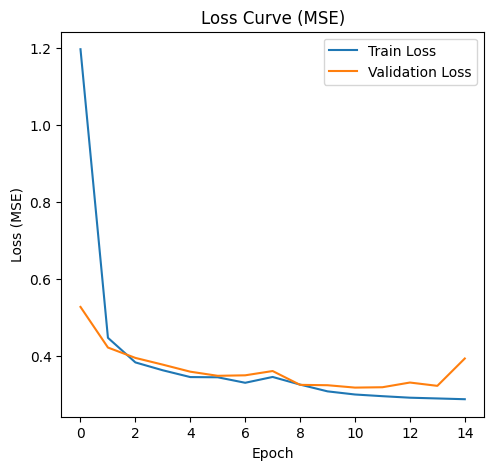

In [26]:
import matplotlib.pyplot as plt

# 학습 시각화 (loss, mae 그래프 생성)
plt.figure(figsize=(12,5))       # 가로 12, 세로 5 설정

# 학습/검증 손실 그래프 생성
plt.subplot(1, 2, 1)                             # 1행 2열 중 첫 번째 그래프를 사용한다.
plt.plot(history.history['loss'], label='Train Loss')        # 학습 손실 값을 선 그래프로 그린다.
plt.plot(history.history['val_loss'], label='Validation Loss') # 검증 손실도 함께 그린다.
plt.title("Loss Curve (MSE)")                    # 그래프 제목을 설정한다.
plt.xlabel("Epoch")                              # X축은 Epoch(학습 반복 횟수)이다.
plt.ylabel("Loss (MSE)")                         # Y축은 손실값(MSE)이다.
plt.legend()                                     # 두 개의 선을 구분하기 위해 범례를 표시한다.

# 학습/검증 MAE 그래프 생성

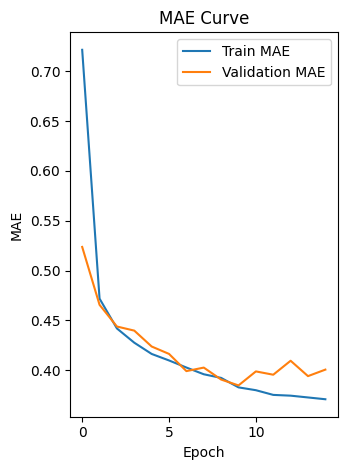

In [27]:
## 학습/검증 MAE 그래프
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')            # 학습 MAE 값을 그래프로 그린다.
plt.plot(history.history['val_mae'], label='Validation MAE')   # 검증 MAE도 함께 그린다.
plt.title("MAE Curve")                                         # 그래프 제목을 설정한다.
plt.xlabel("Epoch")                                            # X축 제목
plt.ylabel("MAE")                                              # Y축 제목.
plt.legend()                                                   # 범례

plt.tight_layout()                                             # 그래프 간격을 자동 조절
plt.show()             

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step


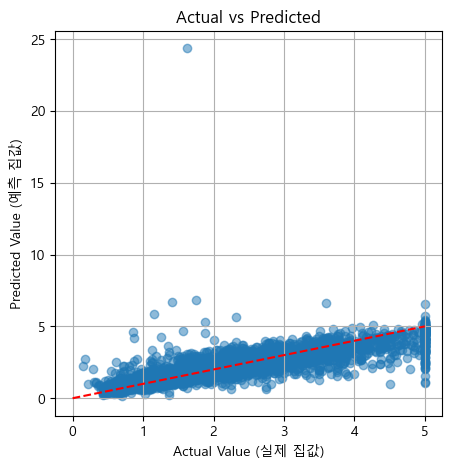

In [30]:
# 10. 실제값 vs 예측값 비교 시각화

from matplotlib import font_manager, rc

# ① 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 지정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 부호 깨짐 방지

plt.figure(figsize=(5,5))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
# 실제 집값(y_test)을 x축에 두고, 예측 집값을 y축에 두어 산점도로 그리기
# alpha=0.5 점의 투명도를 50% 설정..........겹치는 부분을 보기 쉽게 설정

plt.plot([0,5], [0,5], color='red', linestyle='--')  # 예측=실제 인 경우에 직선(대각선)을 그리기
# 모델이 정확하다면 모든 점이 이 직선 근방에 위치해야 한다.

plt.title("Actual vs Predicted")                                         # 그래프 제목을 설정한다.
plt.xlabel("Actual Value (실제 집값)")                                            # X축 제목
plt.ylabel("Predicted Value (예측 집값)")                                              # Y축 제목.
plt.grid(True)                                                           # 그래프에 격자선 추가
plt.show()

            
           

## 텐서플로우 이진 분류(Binary Classification)

In [31]:
# 영화 리뷰를 긍정/부정 두 가지로 분류하는 모델

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences # 리뷰 텍스트 내용이 길이가 다르기 때문에 동일한 길이로 맞추기 위해 패딩 기능을 적요
import matplotlib.pyplot as plt

In [37]:
# 1. IMDB 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# 가장 많이 등장했던 단어 10000개만 사용해서 단어를 정수 인덱스로 변환

In [41]:
# 2. 시퀀스 패딩
max_len = 200                        # 모든 리뷰 길이를 200단어로 길이를 통일
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [42]:
# 3. 텍스트 분류 모델 정의
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=max_len),
    # 정수 인덱스를 32차원 임베딩 벡터로 변환해서 단어의 의미를 벡터 공간에 넣는다.
    # input_dim = 단어 사전의 크기(10,000), output_dim = 임베딩 차원수(32개)
    layers.LSTM(32),
    # LSTM 레이어는 문장 안에서 순서 정보를 학습
    # 문맥(Context)을 고려해서 감성의 특징을 더 정확하게 학습 가능하게 함
    layers.Dense(1, activation='sigmoid')
    # 출력층은 하나의 노드이고, 0~1 사이 확율을 반환하게 되므로 sigmoid 활성화를 사용함
    # 0.5 기준으로 긍정/부정을 판별
])    

D:\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
# 4. 모델 컴파일

model.compile(
    optimizer='adam',              # 성능이 좋아서 많이 사용되는 옵티마이저
    loss='binary_crossentropy',    # 0 or 1 분류 문제이므로 binary crossentropy 손실 함수 사용
    metrics=['accuracy']           # 학습 성능을 accuracy(정확도) 기준으로 평가   
)

In [44]:
# 5. 모델 학습
history = model.fit(
    x_train, y_train,               # 학습 데이터 (입력 문자 + 정답 라벨) 입력
    epochs=3,                       # 전체 데이터를 3번 학습
    batch_size=64,                  # 한번에 64개의 리뷰를 읽고 가중치 업데이트
    validation_split=0.2            # 학습 데이터의 20%를 검증용으로 사용해서 과적합 여부 평가
)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.7638 - loss: 0.4769 - val_accuracy: 0.8498 - val_loss: 0.3519
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.8941 - loss: 0.2660 - val_accuracy: 0.8262 - val_loss: 0.4397
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9286 - loss: 0.1947 - val_accuracy: 0.8676 - val_loss: 0.3328


In [45]:
# 6. 테스트 데이터 평가

acc = model.evaluate(x_test, y_test)[1]             # 테스트셋으로만 모델 평가하고 accuracy를 계산
print("Test Accuracy : ", acc)                      # 최종 테스트 정확도 출력

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8647 - loss: 0.3430
Test Accuracy :  0.8646799921989441


In [46]:
# 7. 예측 수행
pred = model.predict(x_test[:3])                   # 테스트 데이터 중 앞 3개 리뷰에 대해 예측 수행
print("예측 확률 : ", pred)                        # 각 리뷰가 긍정일 확률(0~1 사이값)을 출력
print("예측 결과 : ", (pred > 0.5).astype(int))    # 0.5보다 크면 1(긍정), 작으면 0(부정)으로 바꿔서 최종 예측 레이블을 만든다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
예측 확률 :  [[0.09633533]
 [0.9888639 ]
 [0.79724044]]
예측 결과 :  [[0]
 [1]
 [1]]


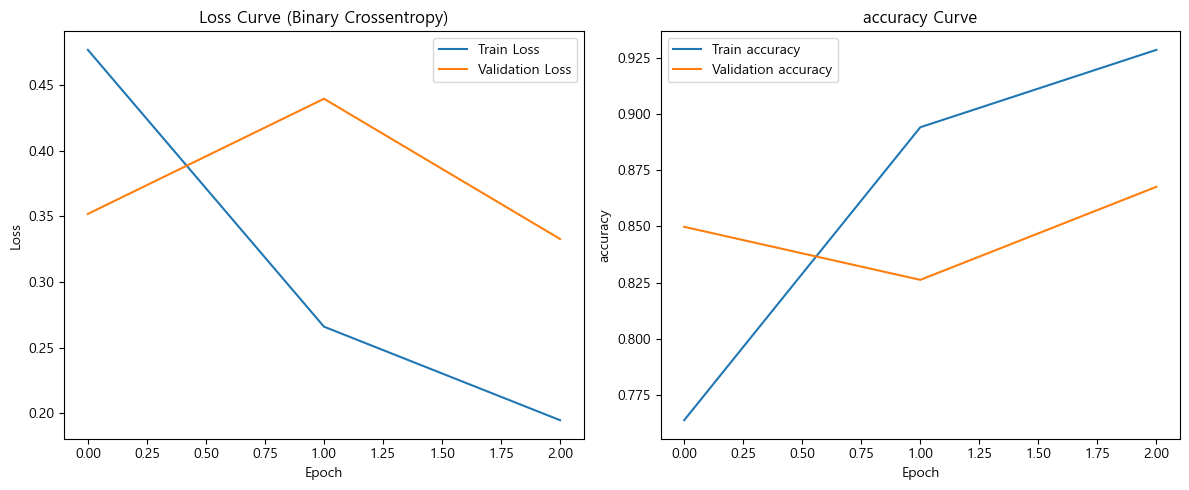

In [48]:
# 학습 과정 시각화 (Losss와 Accuracy 그래프)

plt.figure(figsize=(12,5))

# Loss 그래프
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')            # 학습 데이터 손실을 그래프로 그린다.
plt.plot(history.history['val_loss'], label='Validation Loss')   # 검증 데이터 손실도 함께 그린다.
plt.title("Loss Curve (Binary Crossentropy)")                    # 그래프 제목을 설정한다.
plt.xlabel("Epoch")                                              # X축 epoch
plt.ylabel("Loss")                                               # Y축 loss값.
plt.legend()                                                     # 범례

# Accuracy 그래프
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train accuracy')            # 학습 정확도를 그래프로 그린다.
plt.plot(history.history['val_accuracy'], label='Validation accuracy')   # 검증 정확도도 함께 그린다.
plt.title("accuracy Curve")                                              # 그래프 제목을 설정한다.
plt.xlabel("Epoch")                                                      # X축 epoch
plt.ylabel("accuracy")                                                   # Y축 loss값.
plt.legend()                                                             # 범례


plt.tight_layout()
plt.show()


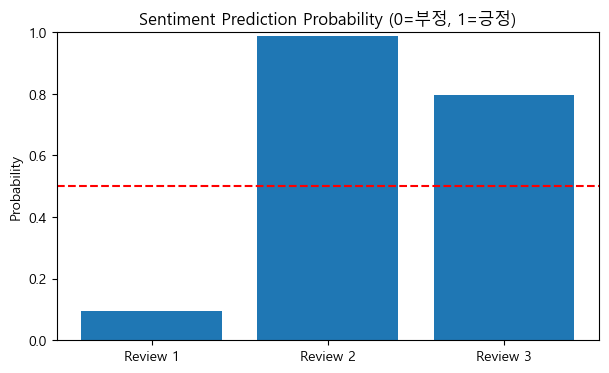

In [50]:
# 9. 예측 결과 시각화 (막대 그래프)
pred_probs = pred.reshape(-1)

plt.figure(figsize=(7,4))
plt.bar([1,2,3], pred_probs)                                           # 3개 리뷰의 긍정 확률을 막대그래프로 표시
plt.axhline(0.5, color='red', linestyle='--')                          # 긍정/부정의 기준선(0.5) 점선 추가
plt.xticks([1,2,3], ['Review 1', 'Review 2', 'Review 3'])              # x축 레이블
plt.ylim(0,1)                                                          # y축 범위를 0~1 지정
plt.title("Sentiment Prediction Probability (0=부정, 1=긍정)")
plt.ylabel("Probability")                                              # y축 긍정 확률 
plt.show()